In [26]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import scipy.stats as ss
import csv
import numpy as np
import sklearn
import glob
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [27]:
X_train = np.load('Conjunto_train.npy')
X_test = np.load('Conjunto_test.npy')
Y_train = np.load('Labels_train.npy')
Y_test = np.load('Labels_test.npy')

1º Comenzaremos con dos instantes temporales

In [28]:
X_train_1 = X_train[:,0,:]
X_train_2 = X_train[:,1,:]

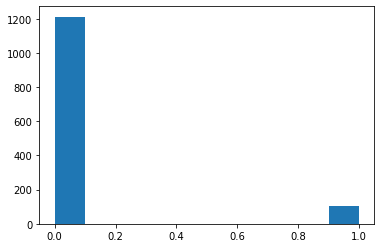

In [29]:
plt.hist(Y_train)
plt.show()

In [31]:
from numpy import *

where_are_NaNs = isnan(X_train_1)
X_train_1[where_are_NaNs] = 0

In [32]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train, Y_train = SMOTE().fit_resample(X_train_1, Y_train)
print(sorted(Counter(Y_train).items()))

[(0, 1212), (1, 1212)]


In [33]:
rf_1 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                       min_impurity_split=None, bootstrap=True, oob_score=True, n_jobs=None, random_state=None, verbose=0, 
                       warm_start=False, class_weight=None)

In [34]:
rf_1.fit(X_train_1, Y_train)

ValueError: Number of labels=2424 does not match number of samples=1317